In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import plotly.express as px

In [71]:
df = pd.read_csv("penguins_size.csv")

In [72]:
df.index

RangeIndex(start=0, stop=344, step=1)

In [73]:
df.info

<bound method DataFrame.info of     species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39.1             18.7              181.0   
1    Adelie  Torgersen              39.5             17.4              186.0   
2    Adelie  Torgersen              40.3             18.0              195.0   
3    Adelie  Torgersen               NaN              NaN                NaN   
4    Adelie  Torgersen              36.7             19.3              193.0   
..      ...        ...               ...              ...                ...   
339  Gentoo     Biscoe               NaN              NaN                NaN   
340  Gentoo     Biscoe              46.8             14.3              215.0   
341  Gentoo     Biscoe              50.4             15.7              222.0   
342  Gentoo     Biscoe              45.2             14.8              212.0   
343  Gentoo     Biscoe              49.9             16.1              213.0   

     bo

In [74]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [75]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [76]:
def missing_values_table(df):
    mis_val = df.isna().sum()
    mis_val_percentage = 100 * df.isna().sum() / len(df)
    mis_value_table = pd.concat([mis_val, mis_val_percentage], axis=1)
    mis_value_table.columns = ['Missing Values', '% Missing']
    sorted_missing_values_table = mis_value_table.sort_values(by='Missing Values', ascending=False)
    print(f"Your selected data frame has {df.shape[0]} rows and {df.shape[1]} columns.")
    return sorted_missing_values_table

In [77]:
df.isnull()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
339,False,False,True,True,True,True,True
340,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False


In [78]:
df.isna()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
339,False,False,True,True,True,True,True
340,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False


In [79]:
df.iloc[['3','339']]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [80]:
df[df['culmen_length_mm'].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [81]:
df= df.drop([3,339])

In [82]:
df[df['culmen_length_mm'].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


In [83]:
missing_values_table(df)

Your selected data frame has 342 rows and 7 columns.


,Missing Values,% Missing
sex,8,2.339181
species,0,0.000000
island,0,0.000000
culmen_length_mm,0,0.000000
culmen_depth_mm,0,0.000000
flipper_length_mm,0,0.000000
body_mass_g,0,0.000000


In [84]:
df[df['culmen_length_mm'].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


In [85]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  8
dtype: int64

In [86]:
df['species'].value_counts()

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

<Axes: xlabel='species'>

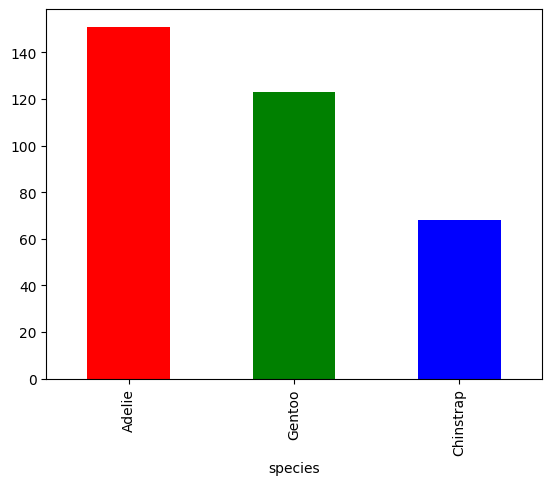

In [87]:
df.species.value_counts().plot(kind='bar',color=['r','g','b'])

In [88]:
df1=df[['culmen_length_mm','culmen_depth_mm','flipper_length_mm']]

<Axes: >

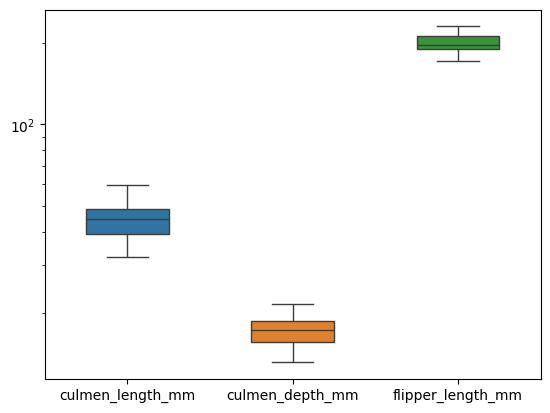

In [89]:
sns.boxplot(data=df1,width=.5,log_scale=True)

In [90]:
plt.show()

In [91]:
imputer=SimpleImputer(strategy='mean')
dfn=imputer.fit_transform(df1)

In [93]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


<Axes: >

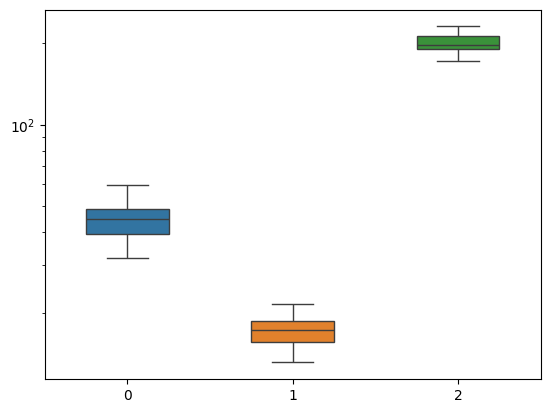

In [102]:
sns.boxplot(data=dfn,width=.5,log_scale=10)

In [104]:
lb= LabelEncoder()
df['sex']=lb.fit_transform(df['sex'])

In [105]:
print(df["sex"])

0      2
1      1
2      1
4      1
5      2
      ..
338    1
340    1
341    2
342    1
343    2
Name: sex, Length: 342, dtype: int32


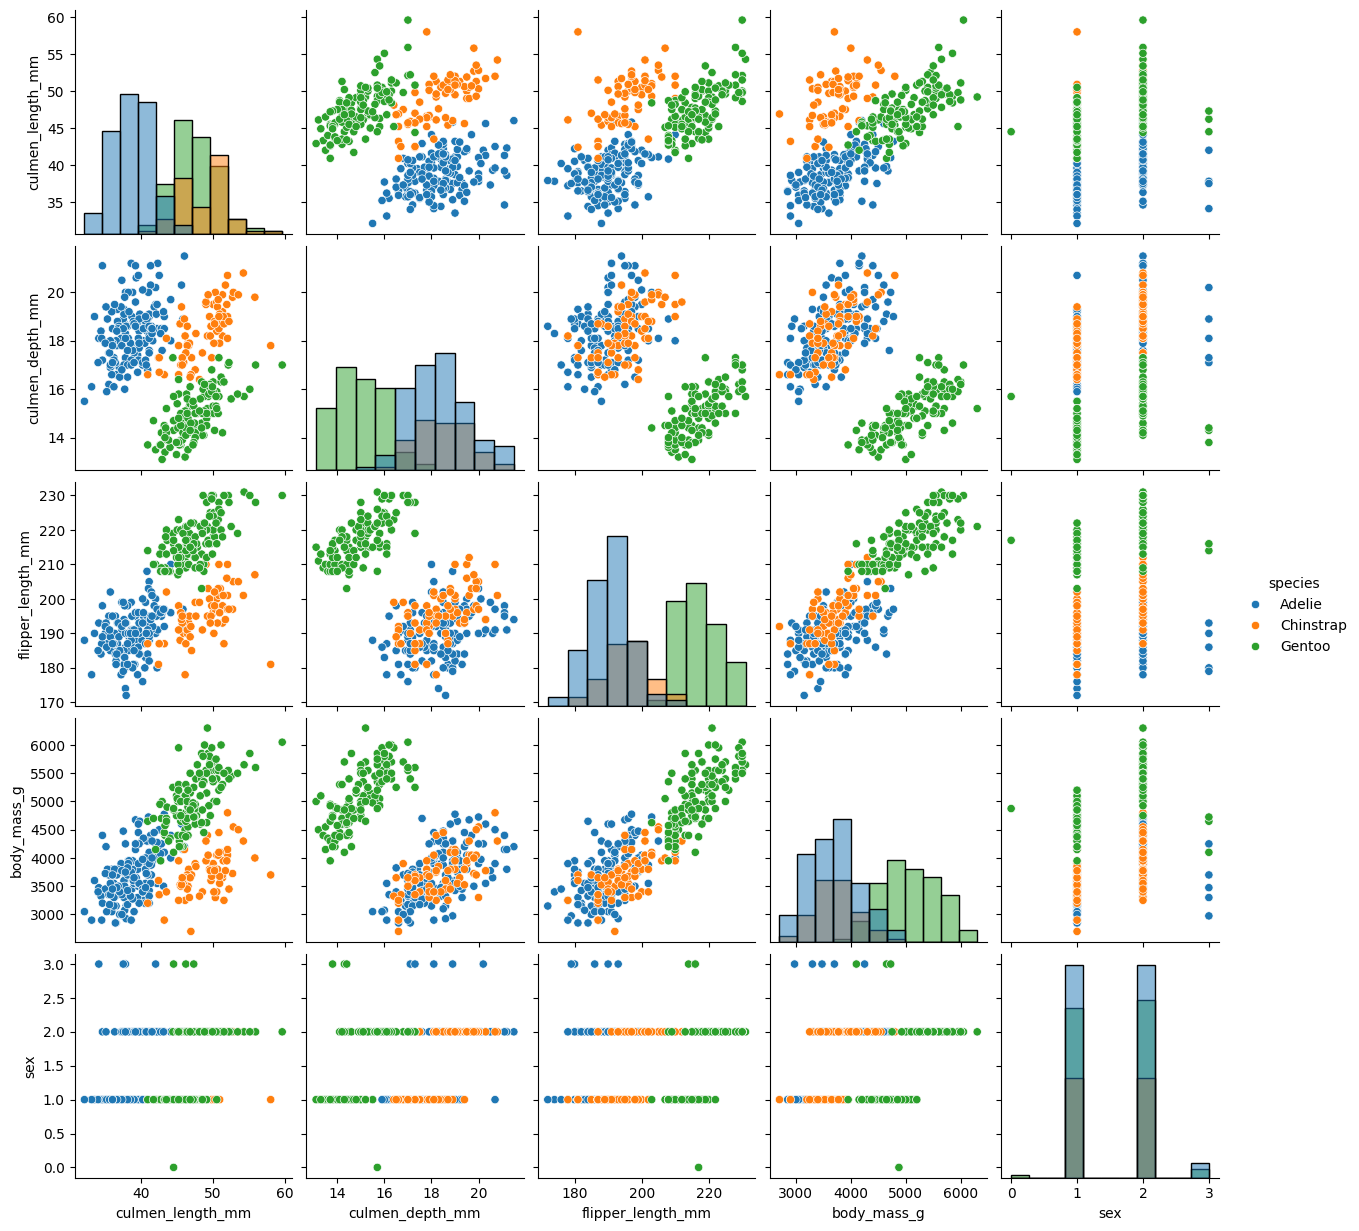

In [107]:
sns.pairplot(df,hue="species",diag_kind="hist")